# Rf 3 1 5_Projectpdf
Multidimensional models: marginizalization of multi-dimensional p.d.f.s through integration



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:51 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataHist.h"
#include "RooGaussian.h"
#include "RooProdPdf.h"
#include "RooPolyVar.h"
#include "TH1.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"
#include "RooNumIntConfig.h"
#include "RooConstVar.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Create pdf m(x,y) = gx(x|y)*g(y)
 --------------------------------------------------------------

Increase default precision of numeric integration
 as this exercise has high sensitivity to numeric integration precision

In [3]:
RooAbsPdf::defaultIntegratorConfig()->setEpsRel(1e-8);
RooAbsPdf::defaultIntegratorConfig()->setEpsAbs(1e-8);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create observables

In [4]:
RooRealVar x("x", "x", -5, 5);
RooRealVar y("y", "y", -2, 2);

Create function f(y) = a0 + a1*y

In [5]:
RooRealVar a0("a0", "a0", 0);
RooRealVar a1("a1", "a1", -1.5, -3, 1);
RooPolyVar fy("fy", "fy", y, RooArgSet(a0, a1));

Create gaussx(x,f(y),sx)

In [6]:
RooRealVar sigmax("sigmax", "width of gaussian", 0.5);
RooGaussian gaussx("gaussx", "Gaussian in x with shifting mean in y", x, fy, sigmax);

Create gaussy(y,0,2)

In [7]:
RooGaussian gaussy("gaussy", "Gaussian in y", y, RooConst(0), RooConst(2));

Create gaussx(x,sx|y) * gaussy(y)

In [8]:
RooProdPdf model("model", "gaussx(x|y)*gaussy(y)", gaussy, Conditional(gaussx, x));

Marginalize m(x,y) to m(x)
 ----------------------------------------------------

Modelx(x) = int model(x,y) dy

In [9]:
RooAbsPdf *modelx = model.createProjection(y);

Use marginalized p.d.f. as regular 1-d p.d.f.
 ------------------------------------------------------------------------------------------

Sample 1000 events from modelx

In [10]:
RooAbsData *data = modelx->generateBinned(x, 1000);

[#1] INFO:NumericIntegration -- RooRealIntegral::init([gaussy_NORM[y]_X_gaussx_NORM[x]]_Int[y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Fit modelx to toy data

In [11]:
modelx->fitTo(*data, Verbose());

[#1] INFO:NumericIntegration -- RooRealIntegral::init([gaussy_NORM[y]_X_gaussx_NORM[x]]_Int[y]) using numeric integrator RooIntegrator1D to calculate Int(y)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gaussx)
[#0] WARNING:Minization -- RooMinimizerFcn::synchronize: WARNING: no initial error estimate available for a1: using 0.4
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a1          -1.50000e+00  4.00000e-01   -3.00000e+00  1.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500        

Plot modelx over data

In [12]:
RooPlot *frame = x.frame(40);
data->plotOn(frame);
modelx->plotOn(frame);

[#1] INFO:NumericIntegration -- RooRealIntegral::init([gaussy_NORM[y]_X_gaussx_NORM[x]]_Int[y]) using numeric integrator RooIntegrator1D to calculate Int(y)


Make 2d histogram of model(x,y)

In [13]:
TH1 *hh = model.createHistogram("x,y");
hh->SetLineColor(kBlue);

TCanvas *c = new TCanvas("rf315_projectpdf", "rf315_projectpdf", 800, 400);
c->Divide(2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame->GetYaxis()->SetTitleOffset(1.4);
frame->Draw();
c->cd(2);
gPad->SetLeftMargin(0.20);
hh->GetZaxis()->SetTitleOffset(2.5);
hh->Draw("surf");

Draw all canvases 

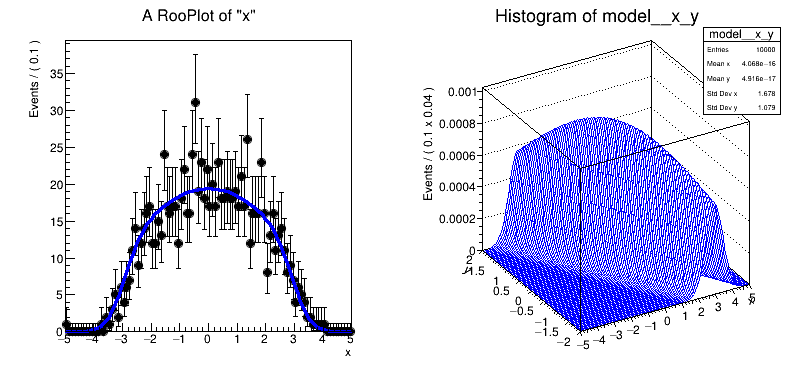

In [14]:
gROOT->GetListOfCanvases()->Draw()